# Proyecto 1 (A): Algoritmos de Regresión 
### Aprendizaje Automático 

Antonio Ayora, Abril Esparza, Saúl Tax

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [4]:
def sex_num(x):
    if x == "female":
        return 2
    else:
        return 1

def smoker_num(x):
    if x == "yes":
        return 2
    else:
        return 1
    
def region_num(x):
    if x == "southeast":
        return 1
    elif x == "southwest":
        return 2
    elif x == "northwest":
        return 3
    else:
        return 4

In [5]:
df['Sex_value'] = df['sex'].apply(sex_num)
df['Smoker_value']=df['smoker'].apply(smoker_num)
df['region_value']=df['region'].apply(region_num)
df.head()

,age,sex,bmi,children,smoker,region,charges,Sex_value,Smoker_value,region_value
0,19,female,27.900,0,yes,southwest,16884.92400,2,2,2
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,3
4,32,male,28.880,0,no,northwest,3866.85520,1,1,3


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Sex_value', 'Smoker_value', 'region_value'],
      dtype='object')

In [7]:
df = df.reindex(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region',
...       'Sex_value', 'Smoker_value', 'region_value', 'charges'])
df

,age,sex,bmi,children,smoker,region,Sex_value,Smoker_value,region_value,charges
0,19,female,27.900,0,yes,southwest,2,2,2,16884.92400
1,18,male,33.770,1,no,southeast,1,1,1,1725.55230
2,28,male,33.000,3,no,southeast,1,1,1,4449.46200
3,33,male,22.705,0,no,northwest,1,1,3,21984.47061
4,32,male,28.880,0,no,northwest,1,1,3,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1,1,3,10600.54830
1334,18,female,31.920,0,no,northeast,2,1,4,2205.98080
1335,18,female,36.850,0,no,southeast,2,1,1,1629.83350
1336,21,female,25.800,0,no,southwest,2,1,2,2007.94500


In [8]:
df.describe()

,age,bmi,children,Sex_value,Smoker_value,region_value,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1.494768,1.204783,2.455157,13270.422265
std,14.049960,6.098187,1.205493,0.500160,0.403694,1.130197,12110.011237
min,18.000000,15.960000,0.000000,1.000000,1.000000,1.000000,1121.873900
25%,27.000000,26.296250,0.000000,1.000000,1.000000,1.000000,4740.287150
50%,39.000000,30.400000,1.000000,1.000000,1.000000,2.000000,9382.033000
75%,51.000000,34.693750,2.000000,2.000000,1.000000,3.000000,16639.912515
max,64.000000,53.130000,5.000000,2.000000,2.000000,4.000000,63770.428010


In [9]:
X = df[['age', 'bmi', 'children',
...        'Sex_value', 'Smoker_value', 'region_value']].values

In [10]:
X.shape[0]

1338

In [11]:
y = df['charges'].values

In [12]:
X_b = np.c_[np.ones((1338,1)), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([-37610.16675339,    256.71095267,    340.63404831,    473.23995692,
          131.18360064,  23861.98003261,    369.81634519])

In [13]:
X_new = np.array(X_b)
y_predict = X_new @ theta_best
y_predict

array([25496.99125189,  3350.06214127,  6601.3633646 , ...,
        4057.15865376,  1433.10162318, 37047.20944565])

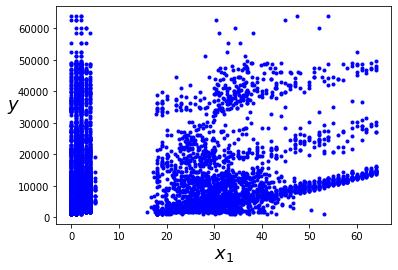

In [14]:
plt.plot(X,  y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.show()

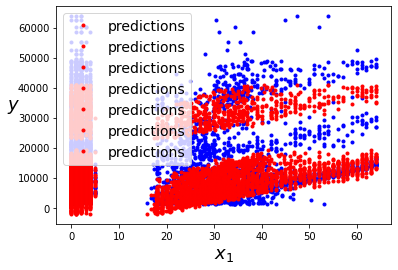

In [15]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r.', linewidth=2, label="predictions")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.show()